In [13]:
#configure a temp run engine environment

from bluesky import RunEngine

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

import databroker
list(databroker.catalog)

import databroker
db = databroker.catalog["sissy2"]

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)


1

In [14]:
from bessyii_devices.end_stations import OAESE
oaese = OAESE('SISSY2EX:', name='oaese')
oaese.wait_for_connection()

In [15]:
from bessyii_devices.camera import DetectorTiffSignals, set_detector_tiff_Signals
pmfc = DetectorTiffSignals(prefix="13URL1:", name="image")

pmfc.wait_for_connection()
set_detector_tiff_Signals(pmfc)



Transient Scan ID: 1     Time: 2021-09-01 17:13:13
Persistent Unique Scan ID: '7447faff-0177-409f-a852-75fc77d0a31f'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 17:13:13.8 |     -1.000 |      0.607 |
|         2 | 17:13:13.9 |     -0.778 |      0.739 |
|         3 | 17:13:13.9 |     -0.556 |      0.857 |
|         4 | 17:13:14.0 |     -0.333 |      0.946 |
|         5 | 17:13:14.0 |     -0.111 |      0.994 |
|         6 | 17:13:14.1 |      0.111 |      0.994 |
|         7 | 17:13:14.1 |      0.333 |      0.946 |
|         8 | 17:13:14.1 |      0.556 |      0.857 |
|         9 | 17:13:14.2 |      0.778 |      0.739 |
|        10 | 17:13:14.2 |      1.000 |      0.607 |
+-----------+------------+------------+------------+
generator scan ['7447faff'] (scan num: 1)





('7447faff-0177-409f-a852-75fc77d0a31f',)

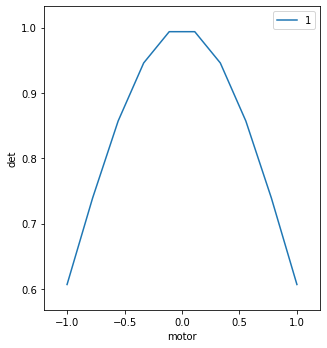

In [16]:
from ophyd.sim import det, motor
from bluesky.plans import scan
RE(scan([det],motor,-1,1,10))


In [18]:
run  = db[-1]
run.primary.metadata['start']

{'uid': '7447faff-0177-409f-a852-75fc77d0a31f',
 'time': 1630509193.7783744,
 'versions': {'ophyd': '1.6.1', 'bluesky': '1.7.0'},
 'scan_id': 1,
 'plan_type': 'generator',
 'plan_name': 'scan',
 'detectors': ['det'],
 'motors': ['motor'],
 'num_points': 10,
 'num_intervals': 9,
 'plan_args': {'detectors': ["SynGauss(prefix='', name='det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
  'num': 10,
  'args': ["SynAxis(prefix='', name='motor', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
   -1,
   1],
  'per_step': 'None'},
 'hints': {'dimensions': [[['motor'], 'primary']]},
 'plan_pattern': 'inner_product',
 'plan_pattern_module': 'bluesky.plan_patterns',
 'plan_pattern_args': {'num': 10,
  'args': ["SynAxis(prefix='', name='motor', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
   -1,
   1]}}



Transient Scan ID: 2     Time: 2021-09-01 17:14:09
Persistent Unique Scan ID: '352b8c2e-7244-47ad-bd75-96f5efbc8d4b'
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|   seq_num |       time |    oaese_x | image_cm_x | image_cm_y | image_cm_c_x | image_cm_c_y | image_Max_Intensity | image_orientation | image_FWHM_x | image_FWHM_y |
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|         1 | 17:14:10.9 |   -1100.00 |        759 |        296 |        713.5 |        286.9 |                 139 |            -2.246 |        289.2 |         86.9 |
|         2 | 17:14:13.6 |   -1111.09 |        759 |        295 |        690.5 |        287.3 |                 129 |            -2.304 |        289.5 |         86.9 |
|         3 | 17:14

('352b8c2e-7244-47ad-bd75-96f5efbc8d4b',)

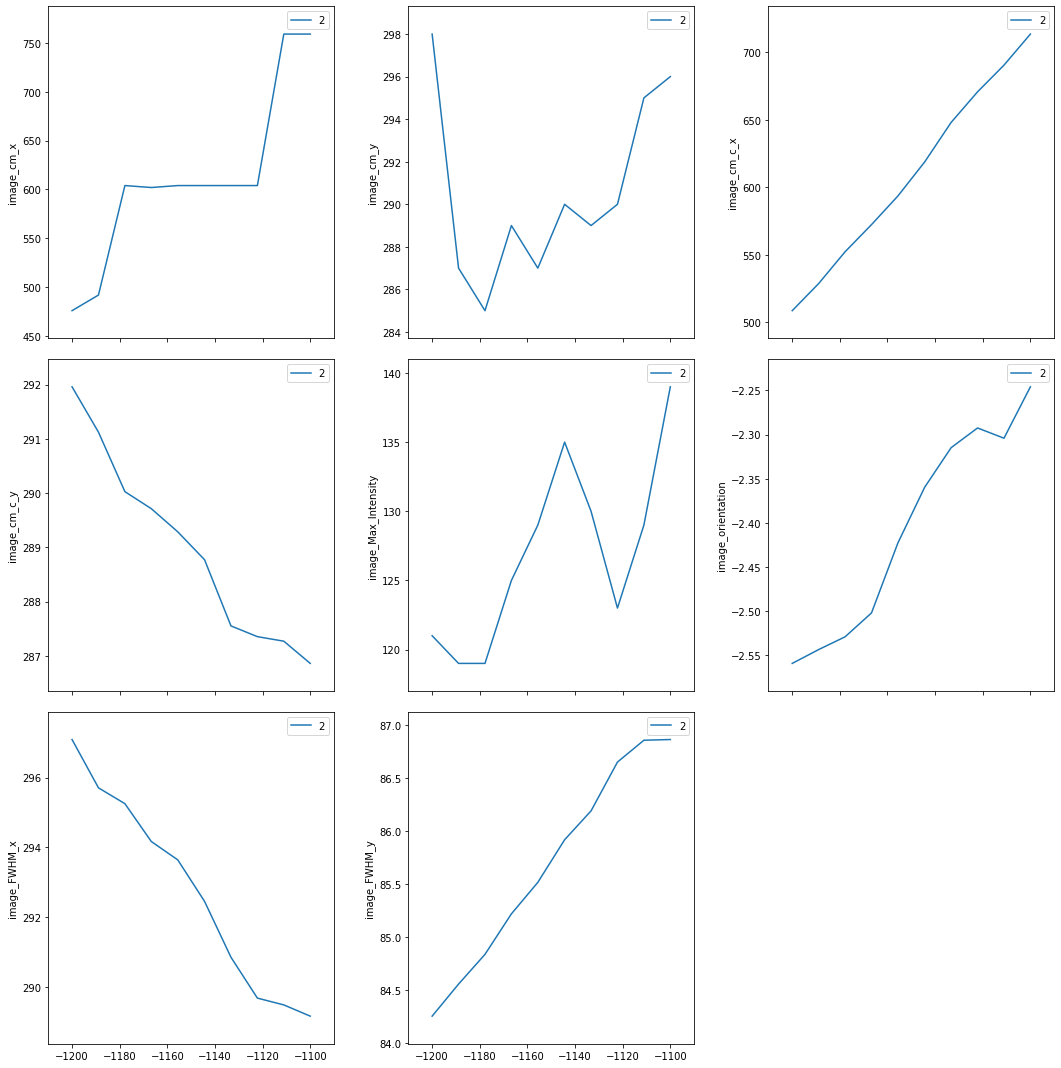

In [19]:
RE(scan([pmfc],oaese.x,-1100,-1200,10))


In [20]:
run = db[-1]

run.primary.metadata['start']

{'uid': '352b8c2e-7244-47ad-bd75-96f5efbc8d4b',
 'time': 1630509249.4276848,
 'versions': {'ophyd': '1.6.1', 'bluesky': '1.7.0'},
 'scan_id': 2,
 'plan_type': 'generator',
 'plan_name': 'scan',
 'detectors': ['image'],
 'motors': ['oaese_x'],
 'num_points': 10,
 'num_intervals': 9,
 'plan_args': {'detectors': ["DetectorTiffSignals(prefix='13URL1:', name='image', read_attrs=['cm_x', 'cm_y', 'cm_c_x', 'cm_c_y', 'Max_Intensity', 'orientation', 'FWHM_x', 'FWHM_y'], configuration_attrs=['cam', 'cam.acquire_period', 'cam.acquire_time', 'cam.image_mode', 'cam.manufacturer', 'cam.model', 'cam.num_exposures', 'cam.num_images', 'cam.trigger_mode'])"],
  'num': 10,
  'args': ["EpicsMotor(prefix='SISSY2EX:motor0:mx', name='oaese_x', parent='oaese', settle_time=0.0, timeout=None, read_attrs=['user_readback', 'user_setpoint'], configuration_attrs=['user_offset', 'user_offset_dir', 'velocity', 'acceleration', 'motor_egu'])",
   -1100,
   -1200],
  'per_step': 'None'},
 'hints': {'dimensions': [[['oae

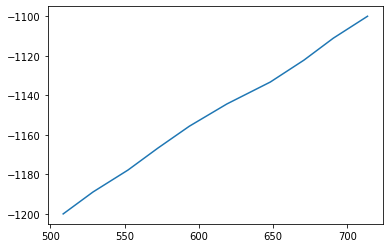

In [22]:
import matplotlib.pyplot as plt
data = run.primary.read()
plt.plot(data.image_cm_c_x,data.oaese_x) # Note that this looses lots of the context given in the xarray


2.082477297479175
713.865809027325


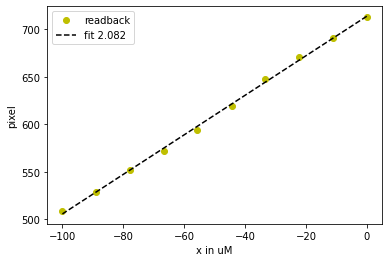

In [26]:
import numpy as np
x=data.oaese_x - data.oaese_x[0]
y=data.image_cm_c_x
m,b = np.polyfit(x,y, 1) 

print(m)
print(b)

fig, ax = plt.subplots()
ax.plot(x, y, 'yo', label='readback')
ax.plot(x, m*x+b, '--k',label='fit '+ str(np.round(m,3))) 


plt.xlabel('x in uM')
plt.ylabel('pixel')
plt.legend()



Transient Scan ID: 3     Time: 2021-09-01 17:20:24
Persistent Unique Scan ID: '3e05a9c0-ffb6-4f37-bf10-94ecdd86443a'
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|   seq_num |       time |    oaese_z | image_cm_x | image_cm_y | image_cm_c_x | image_cm_c_y | image_Max_Intensity | image_orientation | image_FWHM_x | image_FWHM_y |
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|         1 | 17:20:26.8 |  -399.9919 |        556 |        426 |        502.0 |        428.5 |                 130 |            -2.383 |        288.2 |         85.3 |
|         2 | 17:20:29.4 |  -411.1223 |        432 |        404 |        508.8 |        403.4 |                 124 |            -2.728 |        289.9 |         84.9 |
|         3 | 17:20

('3e05a9c0-ffb6-4f37-bf10-94ecdd86443a',)

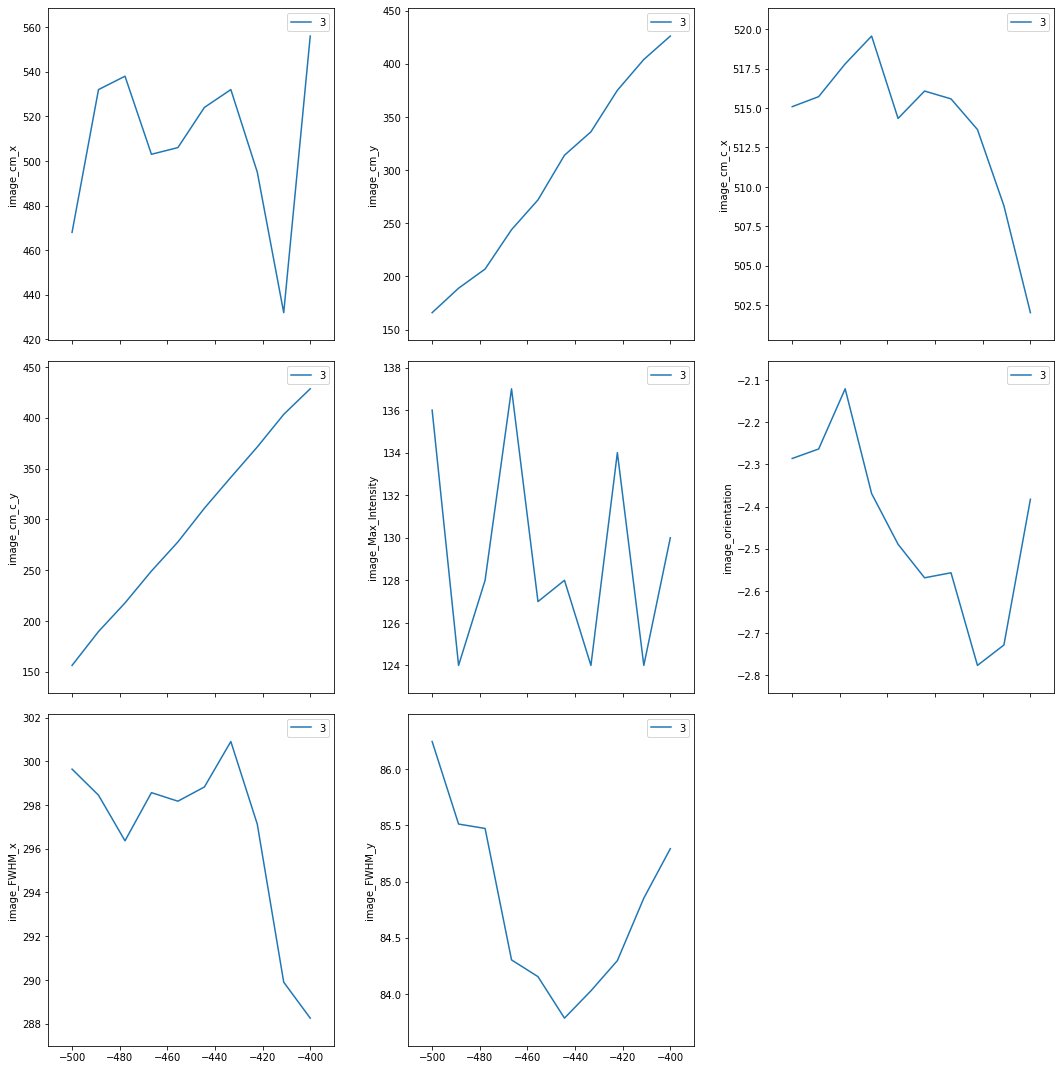

In [27]:
RE(scan([pmfc],oaese.z,-400,-500,10))


2.740217715471563
431.6477043383306


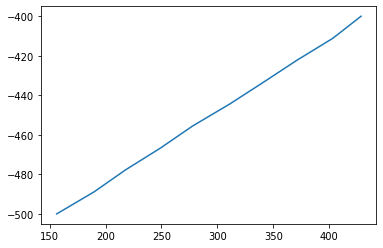

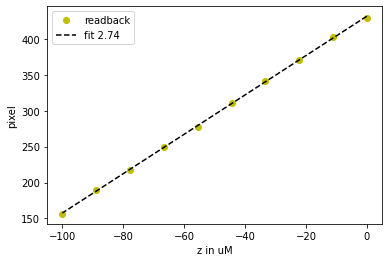

In [28]:
run = db[-1]

run.primary.metadata['start']

data = run.primary.read()
plt.plot(data.image_cm_c_y,data.oaese_z) # Note that this looses lots of the context given in the xarray

x=data.oaese_z - data.oaese_z[0]
y=data.image_cm_c_y
m,b = np.polyfit(x,y, 1) 

print(m)
print(b)

fig, ax = plt.subplots()
ax.plot(x, y, 'yo', label='readback')
ax.plot(x, m*x+b, '--k',label='fit '+ str(np.round(m,3))) 


plt.xlabel('z in uM')
plt.ylabel('pixel')
plt.legend()



Transient Scan ID: 6     Time: 2021-09-01 17:34:26
Persistent Unique Scan ID: 'ff3bfcee-232d-4080-8385-75b97eb8b1a3'
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|   seq_num |       time |    oaese_y | image_cm_x | image_cm_y | image_cm_c_x | image_cm_c_y | image_Max_Intensity | image_orientation | image_FWHM_x | image_FWHM_y |
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|         1 | 17:34:27.7 |   14000.00 |        494 |        131 |        502.5 |        131.9 |                 135 |            -2.512 |        303.7 |         85.0 |
|         2 | 17:34:30.2 |   14105.31 |        493 |        131 |        504.6 |        130.3 |                 135 |            -2.459 |        303.9 |         84.7 |
|         3 | 17:34

('ff3bfcee-232d-4080-8385-75b97eb8b1a3',)

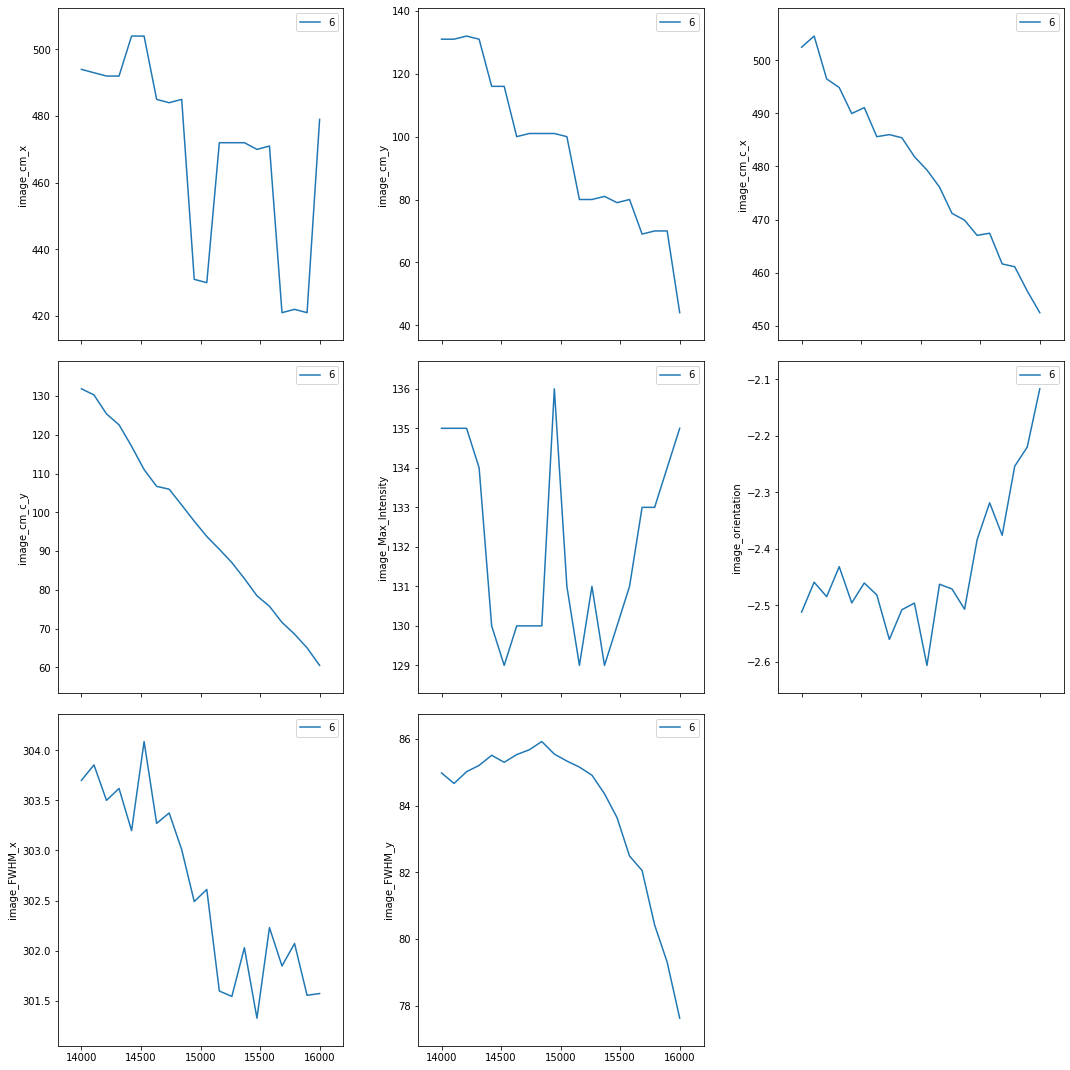

In [32]:
RE(scan([pmfc],oaese.y,14000,16000,20))





Transient Scan ID: 7     Time: 2021-09-01 17:36:28
Persistent Unique Scan ID: 'def79a12-c5ed-4f92-aaec-51d4e6a59f76'
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|   seq_num |       time |    oaese_y | image_cm_x | image_cm_y | image_cm_c_x | image_cm_c_y | image_Max_Intensity | image_orientation | image_FWHM_x | image_FWHM_y |
+-----------+------------+------------+------------+------------+--------------+--------------+---------------------+-------------------+--------------+--------------+
|         1 | 17:36:29.9 |   14500.00 |        502 |        455 |        482.4 |        445.1 |                 133 |            -2.244 |        291.5 |         86.2 |
|         2 | 17:36:32.4 |   14631.56 |        432 |        403 |        474.0 |        402.6 |                 137 |            -2.720 |        289.7 |         86.1 |
|         3 | 17:36

('def79a12-c5ed-4f92-aaec-51d4e6a59f76',)

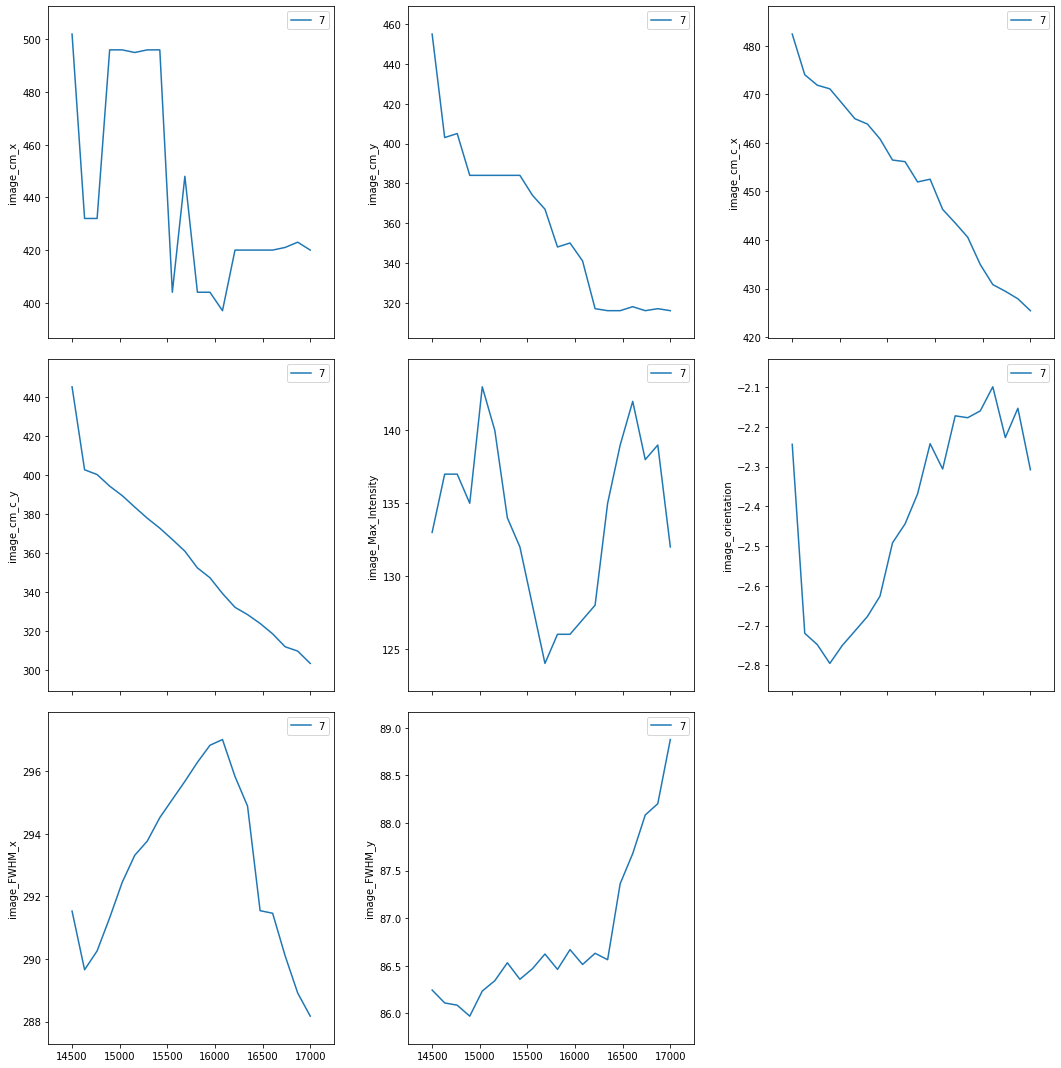

In [33]:
RE(scan([pmfc],oaese.y,14500,17000,20))

